### 필수과제
- 단순한 raw 데이터를 가공 + 변수를 선정하여 회귀식의 값들을 더 높이자!
- 스케일링, 변수 선정일 수 있고, 다양한 방법을 통해서 바로 ols 확인한 결과와 비교해서 수치를 더 높이는 것을 진행
- 수치를 높이는 것을 진행하면서, 어떤 부분을 변화를 주었을 때 수치들이 올라갔는지를 꼭 정리해서 올려주시면 된다.

### 컬럼 설명서
- longitude : 경도
- latitude : 위도
- housing_median_age : 주택 나이(중앙값)
- total_rooms : 전체 방 수
- total_bedrooms : 전체 침실 수
- population : 인구 수
- households : 세대 수
- median_income : 소득(중앙값)
- median_house_value : 주택 가치(중앙값)
- ocean_proximity : 바다 근접도

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 캘리포니아 주택 가격 데이터
calhouse = datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns=calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns=["y"])
df = pd.concat([dfx, dfy], axis=1)

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   y           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# summary 통계량 확인
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
y             0
dtype: int64

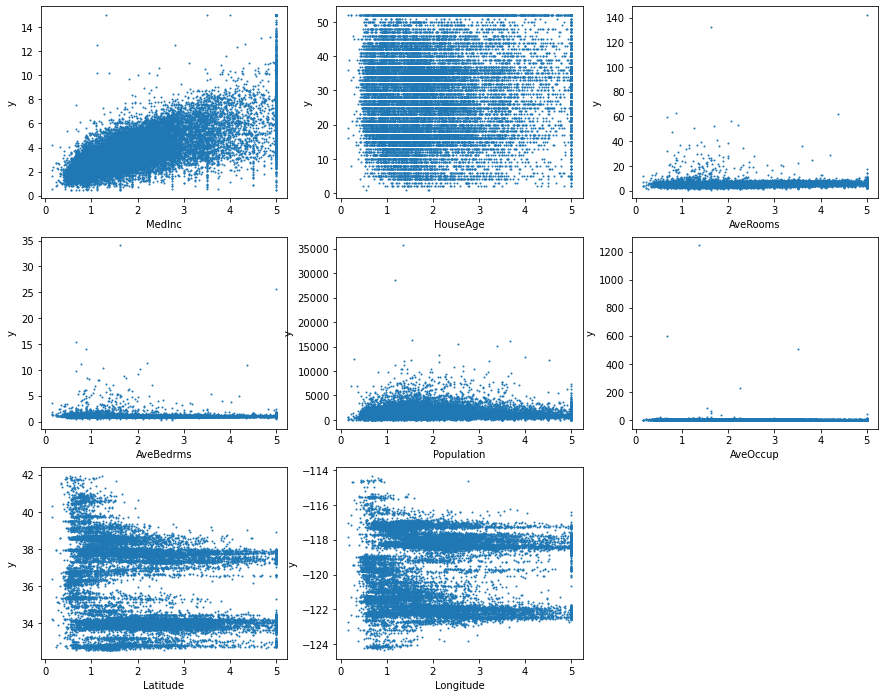

In [32]:
plt.figure(figsize=(15,12))
for i in range(0,8):
    plt.subplot(3, 3, i+1)
    plt.scatter(dfy, dfx.iloc[:, i], s= 1)
    plt.xlabel(dfx.columns[i])
    plt.ylabel(dfy.columns[0])

<AxesSubplot:>

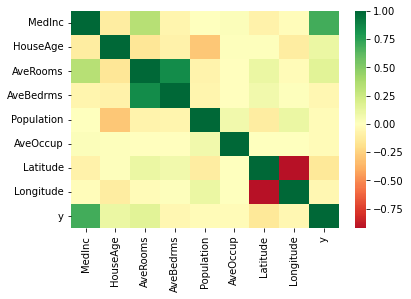

In [36]:
sns.heatmap(df.corr(), center=0, cmap="RdYlGn")

In [42]:
# 모델 1: Y = MedInc + AveRooms
model1 = sm.OLS.from_formula("y~MedInc+AveRooms", data=df)
fit1 = model1.fit()

In [43]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        05:43:06   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5950      0.016     36.836      0.000       0.563       0.627
MedInc         0.4342      0.003    134.497      0.000       0.428       0.440
AveRooms      -0.0381      0.002    -15.375      0.000      -0.043      -0.033
==============================================================================
Omnibus:                     4804.179   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12852.863
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       5.949   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# 모델 2: Y = MedInc + AveRooms + MedInc*AveRooms
model2 = sm.OLS.from_formula("y~MedInc*AveRooms", data=df)
fit2 = model2.fit()

In [45]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     6375.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        05:43:23   Log-Likelihood:                -25473.
No. Observations:               20640   AIC:                         5.095e+04
Df Residuals:                   20636   BIC:                         5.099e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3667      0.033     11.168      0.000       0.302       0.431
MedInc              0.5059      0.010     52.968      0.000       0.487       0.525
AveRooms           -0.0034      0.005     -0.683      0.495      -0.013       0.006
MedInc:AveRooms    -0.0105      0.001     -7.982      0.000      -0.013      -0.008
==============================================================================
Omnibus:                     4576.713   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11181.756
Skew:                           1.229   Prob(JB):                         0.00
Kurtosis:                       5.639   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# 모델 3: Y = MedInc + AveRooms + HouseAge + MedInc*AveRooms MedInc*HouseAge
model3 = sm.OLS.from_formula("y~MedInc*(AveRooms+HouseAge)", data=df)
fit3 = model3.fit()

In [47]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     4372.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        05:43:32   Log-Likelihood:                -24787.
No. Observations:               20640   AIC:                         4.959e+04
Df Residuals:                   20634   BIC:                         4.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1052      0.046     -2.298      0.022      -0.195      -0.015
MedInc              0.4894      0.012     41.652      0.000       0.466       0.512
AveRooms            0.0088      0.005      1.804      0.071      -0.001       0.018
HouseAge            0.0131      0.001     13.136      0.000       0.011       0.015
MedInc:AveRooms    -0.0109      0.001     -8.494      0.000      -0.013      -0.008
MedInc:HouseAge     0.0010      0.000      4.278      0.000       0.001       0.001
==============================================================================
Omnibus:                     4250.918   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10742.972
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.715   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# 모델 4: Y = MedInc + AveRooms + HouseAge + Latitude + MedInc*AveRooms +
# MedInc*HouseAge + MedInc*Latitude
model4 = sm.OLS.from_formula("y~MedInc*(AveRooms+HouseAge+Latitude)", data=df)
fit4 = model4.fit()

In [49]:
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     3230.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        05:52:12   Log-Likelihood:                -24606.
No. Observations:               20640   AIC:                         4.923e+04
Df Residuals:                   20632   BIC:                         4.929e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9887      0.215     13.923      0.000       2.568       3.409
MedInc              0.0795      0.053      1.499      0.134      -0.024       0.183
AveRooms            0.0164      0.005      3.391      0.001       0.007       0.026
HouseAge            0.0130      0.001     13.182      0.000       0.011       0.015
Latitude           -0.0873      0.006    -14.706      0.000      -0.099      -0.076
MedInc:AveRooms    -0.0111      0.001     -8.725      0.000      -0.014      -0.009
MedInc:HouseAge     0.0010      0.000      4.487      0.000       0.001       0.001
MedInc:Latitude     0.0114      0.001      7.761      0.000       0.008       0.014
==============================================================================
Omnibus:                     4210.809   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10508.890
Skew:                           1.126   Prob(JB):                         0.00
Kurtosis:                       5.674   Cond. No.                     8.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# 모델 5: Y = MedInc + AveRooms + HouseAge + Latitude + Longitude+ 
# MedInc*AveRooms + MedInc*HouseAge + MedInc*Latitude + MedInc*Longitude
model5 = sm.OLS.from_formula("y~MedInc*(AveRooms+HouseAge+Latitude+Longitude)", data=df)
fit5 = model5.fit()

In [54]:
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     3467.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        05:57:12   Log-Likelihood:                -22734.
No. Observations:               20640   AIC:                         4.549e+04
Df Residuals:                   20630   BIC:                         4.557e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -22.6628      1.465    -15.466      0.000     -25.535     -19.791
MedInc              -4.9238      0.388    -12.677      0.000      -5.685      -4.163
AveRooms             0.0349      0.004      7.878      0.000       0.026       0.044
HouseAge             0.0031      0.001      3.347      0.001       0.001       0.005
Latitude            -0.2464      0.016    -15.530      0.000      -0.277      -0.215
Longitude           -0.2662      0.017    -16.029      0.000      -0.299      -0.234
MedInc:AveRooms     -0.0049      0.001     -4.169      0.000      -0.007      -0.003
MedInc:HouseAge      0.0015      0.000      7.245      0.000       0.001       0.002
MedInc:Latitude     -0.0696      0.005    -15.225      0.000      -0.079      -0.061
MedInc:Longitude    -0.0648      0.005    -14.325      0.000      -0.074      -0.056
==============================================================================
Omnibus:                     4699.829   Durbin-Watson:                   0.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13059.458
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       6.057   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# 모델 6: Include all interaction terms of MedInc
model6 = sm.OLS.from_formula("y~MedInc*(" + "+".join(calhouse.feature_names) + ")", data=df)
fit6 = model6.fit()

In [57]:
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     2181.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        06:00:49   Log-Likelihood:                -22435.
No. Observations:               20640   AIC:                         4.490e+04
Df Residuals:                   20624   BIC:                         4.503e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -21.1293      1.497    -14.111      0.000     -24.064     -18.194
MedInc               -4.5143      0.399    -11.318      0.000      -5.296      -3.732
HouseAge              0.0032      0.001      3.396      0.001       0.001       0.005
AveRooms             -0.0658      0.008     -8.411      0.000      -0.081      -0.050
AveBedrms             0.4650      0.046     10.034      0.000       0.374       0.556
Population        -7.198e-05   1.14e-05     -6.304      0.000   -9.44e-05   -4.96e-05
AveOccup             -0.0091      0.002     -5.134      0.000      -0.013      -0.006
Latitude             -0.2234      0.016    -13.716      0.000      -0.255      -0.192
Longitude            -0.2455      0.017    -14.451      0.000      -0.279      -0.212
MedInc:HouseAge       0.0015      0.000      7.254      0.000       0.001       0.002
MedInc:AveRooms      -0.0109      0.002     -6.859      0.000      -0.014      -0.008
MedInc:AveBedrms      0.0462      0.011      4.352      0.000       0.025       0.067
MedInc:Population  1.822e-05   2.59e-06      7.023      0.000    1.31e-05    2.33e-05
MedInc:AveOccup       0.0006      0.000      2.982      0.003       0.000       0.001
MedInc:Latitude      -0.0642      0.005    -13.677      0.000      -0.073      -0.055
MedInc:Longitude     -0.0600      0.005    -12.936      0.000      -0.069      -0.051
==============================================================================
Omnibus:                     4604.453   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15528.104
Skew:                           1.116   Prob(JB):                         0.00
Kurtosis:                       6.616   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 결론
- y와의 상관관계가 가장 큰 MedInc을 이용하여 interaction term을 구하고 회귀 적합을 하였다.
- 모델1~6을 통해 MedInc에 대한 interaction term을 추가할수록 R^2은 점점 커지는 경향이 있으며, 각 변수에 대한 p-value는 줄어드는 경향이 있다.
- 모든 변수를 다 사용한 회귀식과 비교했을 때 모델6은 R^2의 값이 조금 더 컸으며 (0.606 < 0.613), 각 변수들의 p-value도 상대적으로 더 작게 나왔다.
- 두 모델 모두 multicolinearity를 측정하는 Cond.No.의 값이 10보다 크고, 모델6이 모든 변수를 사용한 모델보다 multicolinearity가 크다는 결과가 나왔다. 다만 Cond.No.의 증가폭은 상대적으로 크지 않았다.